In [1]:
import pandas as pd
import os,sys
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/15.RecruitRestarauntPrediction')

%run 00.Scripts/01.DataImport.py

HDF5ExtError: HDF5 error back trace

  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5F.c", line 586, in H5Fopen
    unable to open file
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5Fint.c", line 1393, in H5F_open
    unable to read root group
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5Groot.c", line 257, in H5G_mkroot
    unable to verify symbol table
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5Gstab.c", line 1086, in H5G__stab_valid
    unable to locate heap
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5HL.c", line 364, in H5HL_protect
    unable to load heap data block
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5AC.c", line 1763, in H5AC_protect
    H5C_protect() failed
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5C.c", line 2561, in H5C_protect
    can't load entry
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5C.c", line 6772, in H5C_load_entry
    Can't read image*
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5Fio.c", line 133, in H5F_block_read
    read through page buffer failed
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5PB.c", line 742, in H5PB_read
    read through metadata accumulator failed
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5Faccum.c", line 215, in H5F__accum_read
    driver read request failed
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5FDint.c", line 225, in H5FD_read
    addr overflow, addr = 3087340, size = 176, eoa = 2048
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5HL.c", line 364, in H5HL_protect
    unable to load heap data block
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5AC.c", line 1763, in H5AC_protect
    H5C_protect() failed
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5C.c", line 2561, in H5C_protect
    can't load entry
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5C.c", line 6772, in H5C_load_entry
    Can't read image*
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5Fio.c", line 133, in H5F_block_read
    read through page buffer failed
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5PB.c", line 742, in H5PB_read
    read through metadata accumulator failed
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5Faccum.c", line 215, in H5F__accum_read
    driver read request failed
  File "C:\bld\hdf5_1509832479118\work\hdf5-1.10.1\src\H5FDint.c", line 225, in H5FD_read
    addr overflow, addr = 3087340, size = 176, eoa = 2048

End of HDF5 error back trace

Unable to open/create file '01.RawData/DataStore.h5'

In [208]:
import lightgbm as lgb

idv=store['train1_x'].columns

sample=store['train1_x'].index.to_series().drop_duplicates()
train_lgb=lgb.Dataset(store['train1_x'].loc[sample,idv].fillna(-99999),store['train1_y'].loc[sample,'tgt'])

def model_lgb(params):
    model=lgb.train(params, train_lgb)
    ins_pred=pd.Series(model.predict(store['train1_x'].loc[:,idv].fillna(-99999)))
    oos_pred=pd.Series(model.predict(store['val1_x'].loc[:,idv].fillna(-99999)))
    ins_error=np.sqrt(mean_squared_error(store['train1_y'].loc[:,'tgt'].values,ins_pred))
    oos_error=np.sqrt(mean_squared_error(store['val1_y'].loc[:,'tgt'].values,oos_pred))
    
    #print 'RMSLE: ',np.array([ins_error,oos_error])
    var_importance=pd.Series(model.feature_importance(),index=idv)
    #var_importance=var_importance[var_importance>0]
    test_score=pd.Series(np.expm1(model.predict(store['test1_x'].loc[:,idv])),index=store['test1_x'].index.tolist()).to_frame('visitors')
    test_score['visit_date']=store['test1_x']['day'].map(lambda x: date(2017,4,23)+timedelta(days=x))
    return np.array([ins_error,oos_error]),var_importance,test_score
   
# params = {'objective': 'regression','metric': 'rmse','boosting': 'gbdt','max_depth': 7,'num_leaves': 2**7,
#           'learning_rate': 0.05,'num_rounds': 50,'min_data_in_leaf':500,
#           'bagging_fraction': 0.8,'feature_fraction': 0.8}
# output=model_lgb(params)

for param in [1000,1500,2000]:
    params = {'objective': 'regression','metric': 'rmse','boosting': 'gbdt','max_depth': 10,'num_leaves': 2**10,
              'learning_rate': 0.01,'num_rounds': param,'min_data_in_leaf':500,
              'bagging_fraction': 0.8,'feature_fraction': 0.8}
    print param,model_lgb(params)[0]
    

1000 [ 0.467  0.506]
1500 [ 0.459  0.502]
2000 [ 0.453  0.499]


In [194]:
output[0]

array([ 0.504,  0.524])

In [209]:
output[1].sort_values()

reserve_4_hpg           0
reserve_4_air           0
reserve_1_air           6
reserve_3_hpg           6
reserve_3_air           7
reserve_0_air           8
visits_365_4           10
reserve_2_air          10
reserve_1_hpg          13
min_visitors_21        26
reserve_0_hpg          28
visits_365_1           28
min_visitors_wd_5      30
min_visitors_91        37
cnt_visitors_7         38
reserve_2_hpg          39
avg_visitors_wd_8      40
visits_365_3           42
visits_364_3           45
visits_364_4           49
min_visitors_3         53
avg_visitors_wd_10     57
med_visitors_3         61
med_visitors_wd_13     61
min_visitors_wd_21     62
max_visitors_56        69
med_visitors_wd_10     71
avg_visitors_wd_2      71
visits_365_2           72
visits_364_1           73
visits_365_0           80
max_visitors_42        85
med_visitors_wd_8      85
min_visitors_7         85
cnt_visitors_wd_21     96
cnt_visitors_91        96
min_visitors_wd_1     101
med_visitors_7        112
cnt_visitors

In [173]:
output[0]


array([ 0.513,  0.528])

In [210]:
test_predictions=output[2].reset_index()
test_predictions.index=test_predictions['index']+'_'+test_predictions['visit_date'].astype(np.str)
test_predictions=test_predictions['visitors']
sample_submission=store['sample_submission'].copy()
sample_submission['visitors']=sample_submission['id'].map(test_predictions)
sample_submission.to_csv('02.Submissions/02.LightGBM1.csv',index=False)

In [132]:
val=store['val1_x']
val['pred1']=0.00464512885738+val['avg_visitors_42']*0.19307521+val['med_visitors_wd_10']*0.18425902+val['avg_visitors_wd_10']*0.63119156
indices=val['pred1']>0
val=val[indices]
val_y=store['val1_y'][indices]['tgt']
np.sqrt(mean_squared_error(val_y,val['pred1']))


0.53475001752532636

In [52]:
test_predictions.index.to_series().drop_duplicates()

air_00a91d42b08b08d9_2017-04-25    air_00a91d42b08b08d9_2017-04-25
air_0164b9927d20bcc3_2017-04-25    air_0164b9927d20bcc3_2017-04-25
air_0241aa3964b7f861_2017-04-25    air_0241aa3964b7f861_2017-04-25
air_0328696196e46f18_2017-04-25    air_0328696196e46f18_2017-04-25
air_034a3d5b40d5b1b1_2017-04-25    air_034a3d5b40d5b1b1_2017-04-25
air_036d4f1ee7285390_2017-04-25    air_036d4f1ee7285390_2017-04-25
air_0382c794b73b51ad_2017-04-25    air_0382c794b73b51ad_2017-04-25
air_03963426c9312048_2017-04-25    air_03963426c9312048_2017-04-25
air_04341b588bde96cd_2017-04-25    air_04341b588bde96cd_2017-04-25
air_049f6d5b402a31b2_2017-04-25    air_049f6d5b402a31b2_2017-04-25
air_04cae7c1bc9b2a0b_2017-04-25    air_04cae7c1bc9b2a0b_2017-04-25
air_0585011fa179bcce_2017-04-25    air_0585011fa179bcce_2017-04-25
air_05c325d315cc17f5_2017-04-25    air_05c325d315cc17f5_2017-04-25
air_0647f17b4dc041c8_2017-04-25    air_0647f17b4dc041c8_2017-04-25
air_064e203265ee5753_2017-04-25    air_064e203265ee5753_2017-0

In [55]:
def prepare_data_single_model():
    output=[[],[],[],[],[]]
    for i in range(39):
        ins_msk=store['train_y'].iloc[:,i].fillna(0)>0
        oos_msk=store['val_y'].iloc[:,i].fillna(0)>0
        idv=['%s_visitors_%d'%(x,y) for x,y in product(['min','max','avg','med','cnt'],[1,2,3,7,14,21,35,56,91,147])]
        idv+=['%s_visitors_wd%d_%d'%(x,6-i%7,y) for x,y in product(['min','max','avg','med','cnt'],[1,2,3,5,8,13,21])]
        idv+=['air_reserve_%d'%i]
        idv_labels=['%s_visitors_%d'%(x,y) for x,y in product(['min','max','avg','med','cnt'],[1,2,3,7,14,21,35,56,91,147])]
        idv_labels+=['%s_visitors_wd_%d'%(x,y) for x,y in product(['min','max','avg','med','cnt'],[1,2,3,5,8,13,21])]
        idv_labels+=['air_reserve']
        dfs=[]
        dfs.append(store['train_x'].loc[ins_msk,idv].rename(columns=dict(zip(idv,idv_labels))))
        dfs.append(store['val_x'].loc[oos_msk,idv].rename(columns=dict(zip(idv,idv_labels))))
        dfs.append(store['test_x'].loc[:,idv].rename(columns=dict(zip(idv,idv_labels))))
        dfs.append(store['train_y'].loc[ins_msk,i].to_frame('tgt'))
        dfs.append(store['val_y'].loc[oos_msk,i].to_frame('tgt'))
        for j in range(5):
            dfs[j]['day']=i
            output[j].append(dfs[j])
    output=[pd.concat(x) for x in output]
    return output

    
data=prepare_data_single_model()
for x,y in zip(['train1_x','val1_x','test1_x','train1_y','val1_y'],data):
    store[x]=y


In [56]:
for x in ['train1_x','val1_x','test1_x','train1_y','val1_y']:
    print store[x].shape


(273238, 87)
(27728, 87)
(32331, 87)
(273238, 2)
(27728, 2)


In [ ]:
test_predictions=output[2].reset_index()
test_predictions.index=test_predictions['index']+'_'+test_predictions['visit_date'].astype(np.str)
test_predictions=test_predictions['visitors']
sample_submission=store['sample_submission'].copy()
sample_submission['visitors']=sample_submission['id'].map(test_predictions)

In [8]:
# imp=output[1][1].sort_values(ascending=False)
# imp.cumsum()/imp.sum()
# output[1][1].sort_values()
# output[2]

#store={}
for file in ['sample_submission']:
    store[file]=pd.read_hdf('01.RawData/DataStore.h5', file)

In [4]:
from sklearn.linear_model import LinearRegression
from itertools import product
np.set_printoptions(precision=3,suppress=True)

def model_train(params):
    ins_pred=[]
    oos_pred=[]
    ins_tgt=[]
    oos_tgt=[]

    day_errors=[]
    var_importance={}
    test_scores=[]
    for i in range(39):
        ins_msk=store['train_y'].iloc[:,i].fillna(0)>0
        oos_msk=store['val_y'].iloc[:,i].fillna(0)>0
            
        if params!=[]:
            idv=['%s_visitors_%d'%(x,y) for x,y in product(['min','max','avg','med','cnt'],[1,2,3,7,14,21,35,56,91,147])]
            idv+=[x for x in store['train_x'].columns if 'wd%d'%(6-i%7) in x]
            idv+=['reserve_%d_%s_%d'%(x,y,i) for x,y in product(range(5),['air','hpg'])]
            idv+=['visits_%d_%d_%d'%(x,y,i) for x,y in product([364,365],range(5))]
            train_lgb=lgb.Dataset(store['train_x'].loc[ins_msk,idv],store['train_y'].loc[ins_msk,:].iloc[:,i])
            model=lgb.train(params, train_lgb)
            ins_pred.append(pd.Series(model.predict(store['train_x'].loc[ins_msk,idv])))
            oos_pred.append(pd.Series(model.predict(store['val_x'].loc[oos_msk,idv])))
        else:
            idv=['med_visitors_56','avg_visitors_wd%d_13'%(6-i%7)]
            model=LinearRegression()
            ins_vars=store['train_x'].loc[ins_msk,idv]
            ins_vars['med_visitors_56']=ins_vars['med_visitors_56'].replace(-99999,2.86)
            ins_vars['avg_visitors_wd%d_13'%(6-i%7)]=np.where(ins_vars['avg_visitors_wd%d_13'%(6-i%7)]==-99999,ins_vars['med_visitors_56'],ins_vars['avg_visitors_wd%d_13'%(6-i%7)])
            oos_vars=store['val_x'].loc[oos_msk,idv]
            oos_vars['med_visitors_56']=oos_vars['med_visitors_56'].replace(-99999,2.86)
            oos_vars['avg_visitors_wd%d_13'%(6-i%7)]=np.where(oos_vars['avg_visitors_wd%d_13'%(6-i%7)]==-99999,oos_vars['med_visitors_56'],oos_vars['avg_visitors_wd%d_13'%(6-i%7)])
            model.fit(ins_vars,store['train_y'].loc[ins_msk,:].iloc[:,i])
            ins_pred.append(pd.Series(model.predict(ins_vars)))
            oos_pred.append(pd.Series(model.predict(oos_vars)))
            print 'COEF: ',np.array([model.intercept_]),model.coef_

        ins_tgt.append(pd.Series(store['train_y'].loc[ins_msk,:].iloc[:,i].values))
        oos_tgt.append(pd.Series(store['val_y'].loc[oos_msk,:].iloc[:,i].values))
        ins_error=np.sqrt(mean_squared_error(ins_tgt[-1],ins_pred[-1]))
        oos_error=np.sqrt(mean_squared_error(oos_tgt[-1],oos_pred[-1]))
        print 'RMSLE: ',np.array([ins_error,oos_error])
        day_errors.append([ins_error,oos_error])
        var_importance[i]=pd.Series(model.feature_importance(),index=idv)
        test_score=pd.Series(np.expm1(model.predict(store['test_x'].loc[:,idv])),index=store['test_x'].index.tolist()).to_frame('visitors')
        test_score['visit_date']=date(2017,4,23)+timedelta(days=i)
        test_scores.append(test_score)
    ins_error=np.sqrt(mean_squared_error(pd.concat(ins_tgt),pd.concat(ins_pred)))
    oos_error=np.sqrt(mean_squared_error(pd.concat(oos_tgt),pd.concat(oos_pred)))
    day_errors.append([ins_error,oos_error])
    day_errors=pd.DataFrame(day_errors,columns=['train','test'])
    var_importance=pd.DataFrame(var_importance).unstack()
    var_importance=var_importance[var_importance>0]
    test_scores=pd.concat(test_scores)
    return day_errors,var_importance,test_scores

#a=model_train([])

In [5]:
import lightgbm as lgb
params = {'objective': 'regression','metric': 'rmse','boosting': 'gbdt','max_depth': 10,'num_leaves': 2**5,
              'learning_rate': 0.05,'num_rounds': 100,
        'bagging_fraction': 0.8,'feature_fraction': 0.8}

output=model_train(params)

C:\Users\arpit.goel\AppData\Local\Continuum2\Anaconda2\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE:  [ 0.306  0.412]
RMSLE:  [ 0.341  0.424]
RMSLE:  [ 0.338  0.431]
RMSLE:  [ 0.053  0.053]
RMSLE:  [ 0.025  0.036]
RMSLE:  [ 0.007  0.012]
RMSLE:  [ 0.359  0.471]
RMSLE:  [ 0.393  0.629]
RMSLE:  [ 0.433  0.732]
RMSLE:  [ 0.417  0.602]
RMSLE:  [ 0.409  0.533]
RMSLE:  [ 0.41   0.504]
RMSLE:  [ 0.365  0.472]
RMSLE:  [ 0.362  0.486]
RMSLE:  [ 0.399  0.56 ]
RMSLE:  [ 0.438  0.581]
RMSLE:  [ 0.427  0.562]
RMSLE:  [ 0.411  0.524]
RMSLE:  [ 0.415  0.524]
RMSLE:  [ 0.367  0.481]
RMSLE:  [ 0.367  0.507]
RMSLE:  [ 0.407  0.579]
RMSLE:  [ 0.44   0.567]
RMSLE:  [ 0.432  0.564]
RMSLE:  [ 0.416  0.534]
RMSLE:  [ 0.418  0.554]
RMSLE:  [ 0.373  0.505]
RMSLE:  [ 0.373  0.49 ]
RMSLE:  [ 0.411  0.603]
RMSLE:  [ 0.442  0.546]
RMSLE:  [ 0.438  0.596]
RMSLE:  [ 0.421  0.527]
RMSLE:  [ 0.423  0.514]
RMSLE:  [ 0.381  0.469]
RMSLE:  [ 0.381  0.44 ]
RMSLE:  [ 0.419  0.534]
RMSLE:  [ 0.44   0.531]
RMSLE:  [ 0.444  0.548]
RMSLE:  [ 0.422  0.501]


In [6]:
output[1].to_frame('Imp').sort_values(by='Imp',ascending=False)

Imp
5  min_visitors_1       2381.0
4  min_visitors_1        775.0
   max_visitors_2        747.0
3  avg_visitors_2        711.0
   avg_visitors_3        670.0
4  min_visitors_2        639.0
5  max_visitors_1        423.0
4  avg_visitors_2        384.0
3  min_visitors_3        370.0
0  avg_visitors_7        323.0
3  max_visitors_3        321.0
1  min_visitors_7        282.0
   avg_visitors_7        268.0
2  min_visitors_7        236.0
   avg_visitors_7        221.0
0  max_visitors_7        211.0
3  med_visitors_3        211.0
0  min_visitors_7        197.0
2  med_visitors_7        190.0
3  max_visitors_2        183.0
0  avg_visitors_3        176.0
3  min_visitors_2        170.0
   med_visitors_2        155.0
36 avg_visitors_wd5_21   151.0
8  avg_visitors_wd5_21   147.0
2  avg_visitors_3        143.0
1  med_visitors_7        140.0
22 avg_visitors_wd5_21   138.0
0  med_visitors_7        135.0
37 avg_visitors_wd4_21   134.0
...                        ...
15 med_visitors_wd5_1      1.0
8  avg_visitors_1          1.0
26 min_visitors_wd1_1      1.0
3  visits_365_1_3          1.0
   visits_365_0_3          1.0
   visits_364_3_3          1.0
24 cnt_visitors_2          1.0
36 cnt_visitors_3          1.0
3  visits_364_2_3          1.0
4  max_visitors_147        1.0
12 min_visitors_wd1_1      1.0
4  visits_365_1_4          1.0
   min_visitors_21         1.0
23 min_visitors_wd4_1      1.0
4  visits_364_1_4          1.0
   visits_364_0_4          1.0
27 avg_visitors_1          1.0
4  reserve_3_hpg_4         1.0
   reserve_2_hpg_4         1.0
37 reserve_3_air_37        1.0
4  med_visitors_wd2_3      1.0
   max_visitors_wd2_2      1.0
17 min_visitors_wd3_1      1.0
4  med_visitors_wd2_1      1.0
23 reserve_4_air_23        1.0
22 cnt_visitors_wd5_1      1.0
38 avg_visitors_1          1.0
0  min_visitors_91         1.0
4  max_visitors_wd2_3      1.0
1  cnt_visitors_wd5_5      1.0

[4080 rows x 1 columns]

In [ ]:
output[1].to_frame('Imp').reset_index()

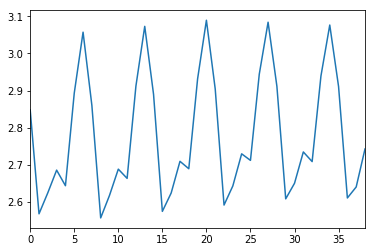

In [139]:
store['train_y'].replace(-99999,np.nan).replace(0,np.nan).mean().plot()

In [9]:
test_predictions=output[2].reset_index()
test_predictions.index=test_predictions['index']+'_'+test_predictions['visit_date'].astype(np.str)
test_predictions=test_predictions['visitors']
sample_submission=store['sample_submission'].copy()
sample_submission['visitors']=sample_submission['id'].map(test_predictions)

In [10]:
sample_submission.to_csv('02.Submissions/03.LightGBMDaily.csv',index=False)

In [126]:
def prepare_dataset(dt):
    return get_timespan(visits,dt-timedelta(days=6),1,7)
    features={}
    for i in [1,2,3,7,14,21,35,42,56,91,147]:
        dcut=get_timespan(visits,dt,i)
        features['avg_visitors_%d'%i]=dcut.mean(axis=1).values
        features['min_visitors_%d'%i]=dcut.min(axis=1).values
        features['max_visitors_%d'%i]=dcut.max(axis=1).values
        features['med_visitors_%d'%i]=dcut.median(axis=1).values
        features['cnt_visitors_%d'%i]=dcut.count(axis=1).values
    for i,j in product(range(7),[1,2,3,5,8,10,12,13,21]):
        dcut=get_timespan(visits,dt-timedelta(days=i),j,7)
        features['avg_visitors_wd%d_%d'%(i,j)]=dcut.mean(axis=1).values
        features['min_visitors_wd%d_%d'%(i,j)]=dcut.min(axis=1).values
        features['max_visitors_wd%d_%d'%(i,j)]=dcut.max(axis=1).values
        features['med_visitors_wd%d_%d'%(i,j)]=dcut.median(axis=1).values
        features['cnt_visitors_wd%d_%d'%(i,j)]=dcut.count(axis=1).values
    reserve_1=air_reserve[air_reserve['reserve_date']<dt]
    reserve_1=reserve_1[reserve_1['visit_date']>=dt]
    reserve_1=reserve_1[reserve_1['visit_date']<=dt+timedelta(39)]
    reserve_1=reserve_1.groupby(['air_store_id','visit_date'])['reserve_visitors'].sum().unstack().reindex(visits.index)
    for i in range(39):
        if dt+timedelta(days=i) in reserve_1.columns:
            features['air_reserve_%d'%i]=reserve_1[dt+timedelta(days=i)].values
    X=pd.DataFrame(features,index=visits.index)
    if (dt-date(2017,4,23)).days<0:
        y=visits[pd.date_range(dt,periods=39)].values
        y=pd.DataFrame(y,index=visits.index)
        return X,y
    return X

prepare_dataset(date(2017,4,22)).loc['air_00a91d42b08b08d9'].to_clipboard()

In [129]:
def get_timespan(df,dt,window,interval=1):
    start=dt-timedelta(days=window*interval-7)
    return df[pd.date_range(start,periods=window,freq='%dD'%interval)]

#get_timespan(visits,date(2017,4,22),window=5,interval=7)
visits[pd.date_range(date(2017,4,22)+timedelta(days=1),periods=39)]

visit_date,2017-04-23 00:00:00,2017-04-24 00:00:00,2017-04-25 00:00:00,2017-04-26 00:00:00,2017-04-27 00:00:00,2017-04-28 00:00:00,2017-04-29 00:00:00,2017-04-30 00:00:00,2017-05-01 00:00:00,2017-05-02 00:00:00,...,2017-05-22 00:00:00,2017-05-23 00:00:00,2017-05-24 00:00:00,2017-05-25 00:00:00,2017-05-26 00:00:00,2017-05-27 00:00:00,2017-05-28 00:00:00,2017-05-29 00:00:00,2017-05-30 00:00:00,2017-05-31 00:00:00
air_store_id,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air_0164b9927d20bcc3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air_0241aa3964b7f861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air_0328696196e46f18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air_034a3d5b40d5b1b1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air_036d4f1ee7285390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air_0382c794b73b51ad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air_03963426c9312048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
air_04341b588bde96cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
a=store['air_visit_data'][store['air_visit_data'].index.get_level_values(0)=='air_00a91d42b08b08d9']
a['weekday']=a.index.get_level_values(1).weekday
a['week_start']=a.index.get_level_values(1)-pd.TimedeltaIndex(a['weekday'],unit='D')
a.set_index(['week_start','weekday']).unstack().to_clipboard()


In [99]:
np.log(10)

2.3025850929940459